In [1]:
import vcf
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from bisect import bisect_left
import seaborn as sns

In [52]:
target = list(df[(df['lineage']=='AY.12 (Delta-like)')|(df['lineage']=='AY.9 (Delta-like)')|(df['lineage']=='AY.4 (Delta-like)')]['INAB sample ID'])

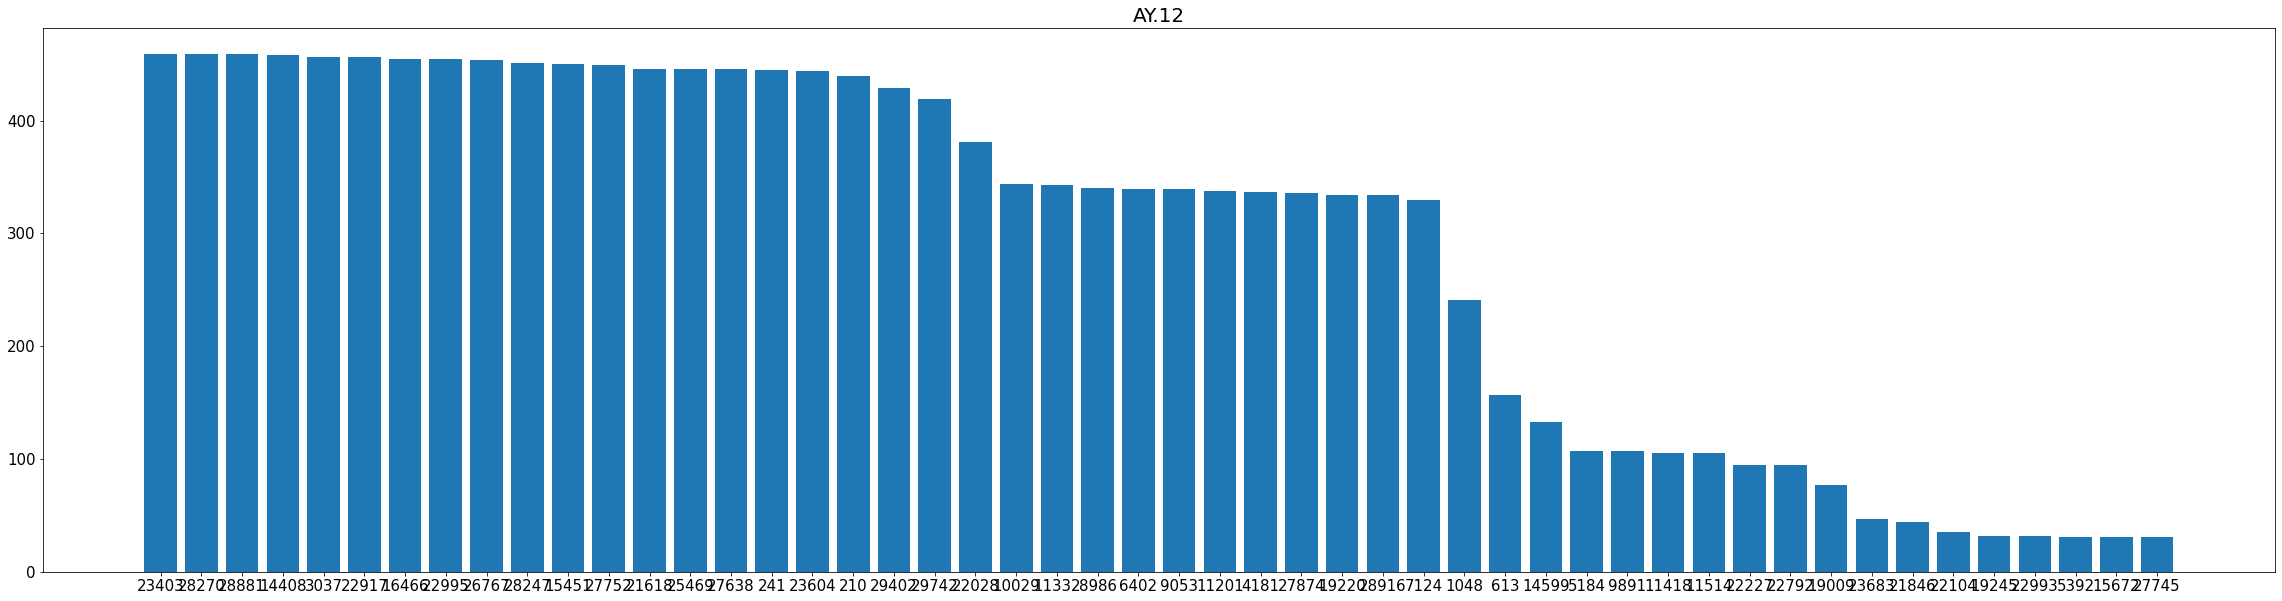

In [53]:
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

pos_record = {}

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}
plt.figure(figsize=(40, 10))
x = list(sor_res.keys())
y = list(sor_res.values())
plt.tick_params(labelsize=15)
plt.title('AY.12',fontsize=20)
plt.bar(x[:50],y[:50])

pos = x[:50]

# AY.12

In [77]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

In [78]:
target1 = list(df[(df['lineage']=='AY.12 (Delta-like)')]['INAB sample ID'])

In [79]:
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

<BarContainer object of 50 artists>

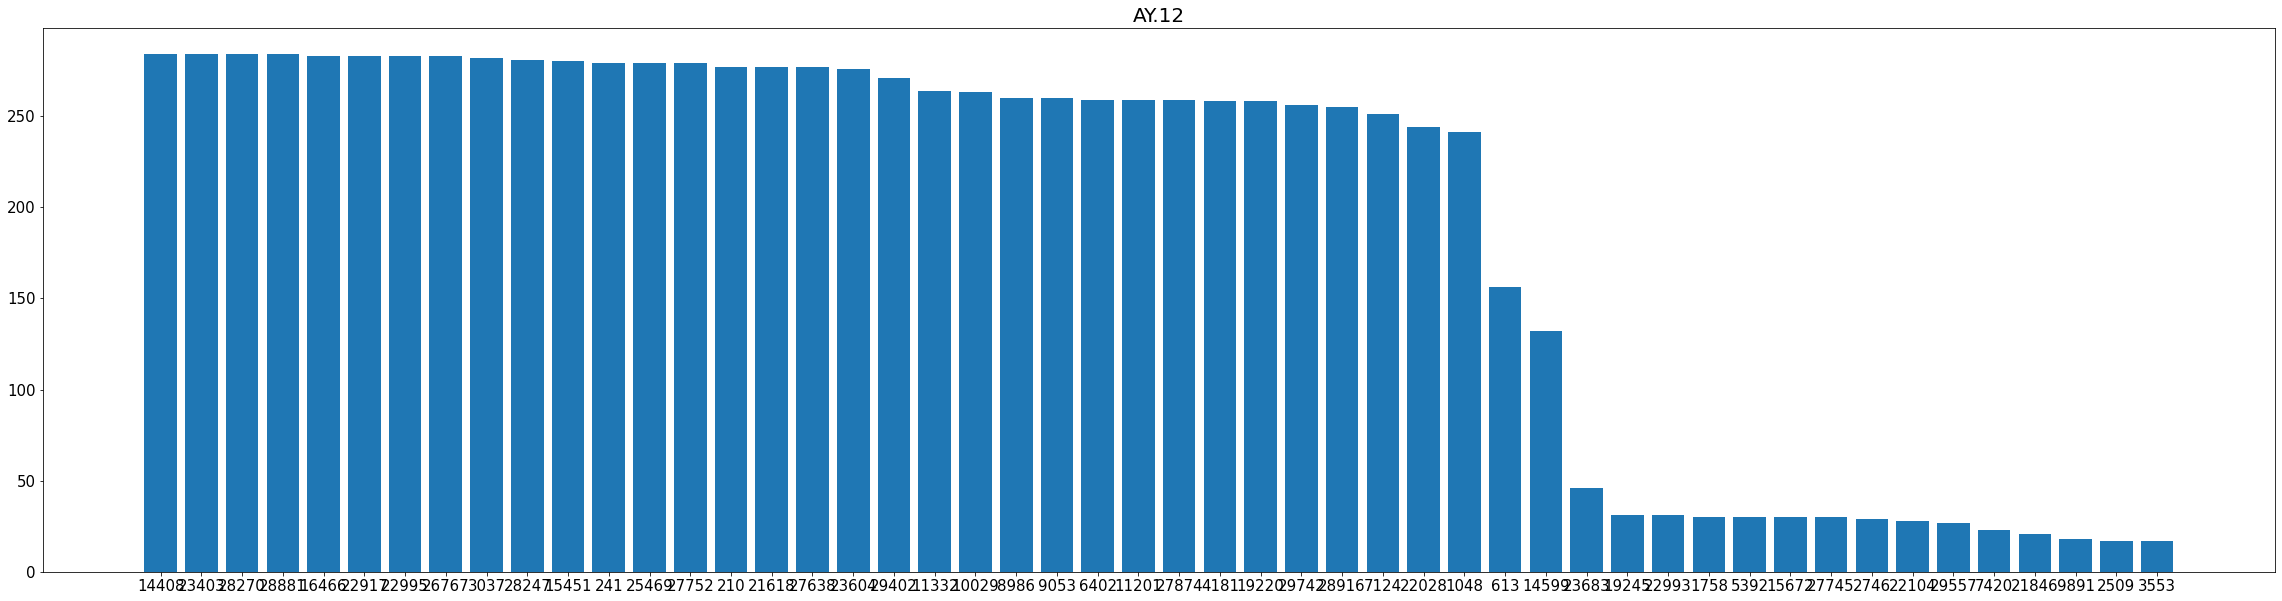

In [80]:
pos_record = {}

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target1:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}
plt.figure(figsize=(40, 10))
x = list(sor_res.keys())
y = list(sor_res.values())
plt.tick_params(labelsize=15)
plt.title('AY.12',fontsize=20)
plt.bar(x[:50],y[:50])

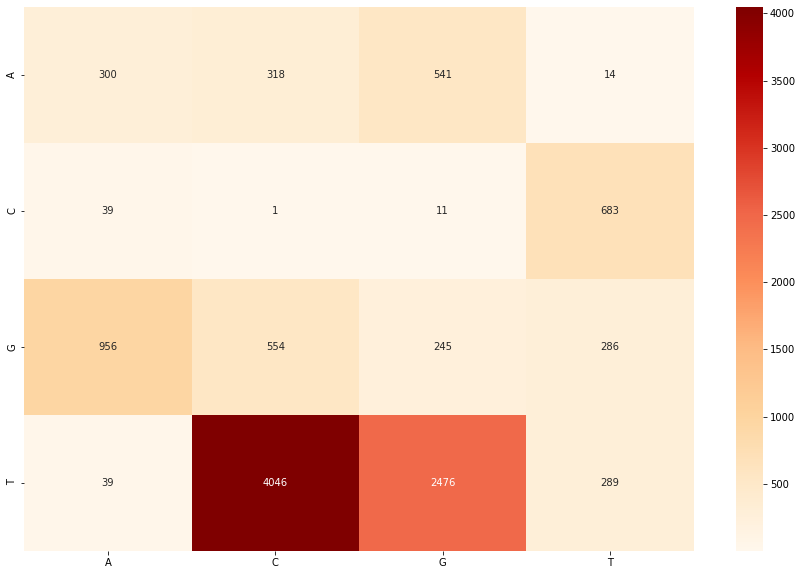

In [58]:
nucleotide_record = {'A':{'A':0,'C':0,'G':0,'T':0},'C':{'A':0,'C':0,'G':0,'T':0},
          'G':{'A':0,'C':0,'G':0,'T':0},'T':{'A':0,'C':0,'G':0,'T':0}}
nucleotide = ['A','C','G','T']
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target1:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.ALT[0] in nucleotide:
                    if record.REF[0] in nucleotide:
                        nucleotide_record[record.REF[0]][str(record.ALT[0])]+=1

df = pd.DataFrame(nucleotide_record, index=nucleotide, columns=nucleotide)
plt.figure(figsize=(15,10))
sns.heatmap(df, annot=True, fmt='d',cmap="OrRd",annot_kws={'size':10})
plt.show()

# 氨基酸转换

In [9]:
nucl_pos = [265,805,2719,8554,10054,10972,11842,12091,12685,13024,
            13441,13468,16236,18039,19620,20658,21552,21562,
            25384,25392,26220,26244,26472,26522,27191,27201,27387,
            27393,27759,27887,27893,28259,28273,29533,29557,29674,29903]


label = ['outlier','NSP1','NSP2','NSP3','NSP4','NSP5','NSP6','NSP7','NSP8','NSP9',
        'NSP10','NSP12a','NSP12b','NSP13','NSP14','NSP15','NSP16','outlier',
        'S','outlier','ORF3a','outlier','E','outlier','M','outlier','ORF6',
        'outlier','ORF7a','ORF7b','outlier','ORF8','outlier','N','outlier','ORF10','outlier']

nucl_dict = {}
for i in label:
    nucl_dict[i] = 0
attr2 = list(nucl_dict.keys())

In [76]:
nucl = []

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target1:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            nucl_dict = {}
            for i in label:
                nucl_dict[i] = 0
            for record in test:
                nucl_dict[label[bisect_left(nucl_pos,record.POS)]]+=1
            c = list(nucl_dict.values())
            c = t + c
            nucl.append(c)
nucl = pd.DataFrame(nucl)
nucl.columns = (['sample ID']+attr2)
nucl

,sample ID,outlier,NSP1,NSP2,NSP3,NSP4,NSP5,NSP6,NSP7,NSP8,...,S,ORF3a,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF10
0,V3497,4,2,1,4,3,0,2,0,0,...,6,1,0,1,0,2,1,1,3,0
1,V3498,5,0,2,8,3,0,2,0,0,...,9,1,0,1,0,3,1,1,3,0
2,V3504,5,0,2,8,3,0,2,0,0,...,9,1,0,1,0,3,1,1,3,0
3,V3506,4,1,1,4,3,0,2,0,0,...,6,1,1,2,0,2,1,1,3,0
4,V3507,4,1,1,4,3,0,2,0,0,...,6,1,0,1,0,2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,V4128,4,1,2,4,4,0,2,0,0,...,6,1,0,1,0,2,1,1,3,0
280,V4129,4,1,0,3,3,0,2,0,0,...,5,1,0,1,0,3,1,1,3,0
281,V4130,5,0,2,8,3,0,2,0,0,...,9,1,0,2,0,3,1,1,2,1
282,V4131,2,1,1,5,4,0,3,0,0,...,6,1,0,1,0,4,1,1,3,0


In [11]:
outputpath = 'C:/Users/Aral/Desktop/AY12AY4AY9_氨基酸.csv'
#nucl.to_csv(outputpath, sep=',',index=False,mode='a')

In [95]:
x = []
name1 = []
for i in range(len(file_name)):
    tar = [0]*len(pos)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target1:
            name1.append(t[0])
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos:
                    if p.ALT[0] == 'A':
                        tar[pos.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos.index(str(p.POS))] = 4
            x.append(tar)

In [96]:
AY12_POS = pd.DataFrame(x)
AY12_POS.columns = pos
AY12_POS['Label'] = 3

In [90]:
AY12_POS

,23403,28270,28881,14408,3037,22917,16466,22995,26767,28247,...,19009,23683,21846,22104,19245,22993,5392,15672,27745,Label
0,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY12
1,3,4,4,4,4,3,4,1,2,1,...,0,4,0,4,4,4,4,4,3,AY12
2,3,4,4,4,4,3,4,1,2,1,...,0,4,0,4,4,4,4,4,3,AY12
3,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY12
4,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY12
280,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY12
281,3,4,4,4,4,3,4,1,2,1,...,0,4,0,4,4,4,4,4,3,AY12
282,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY12


# AY.4

<BarContainer object of 50 artists>

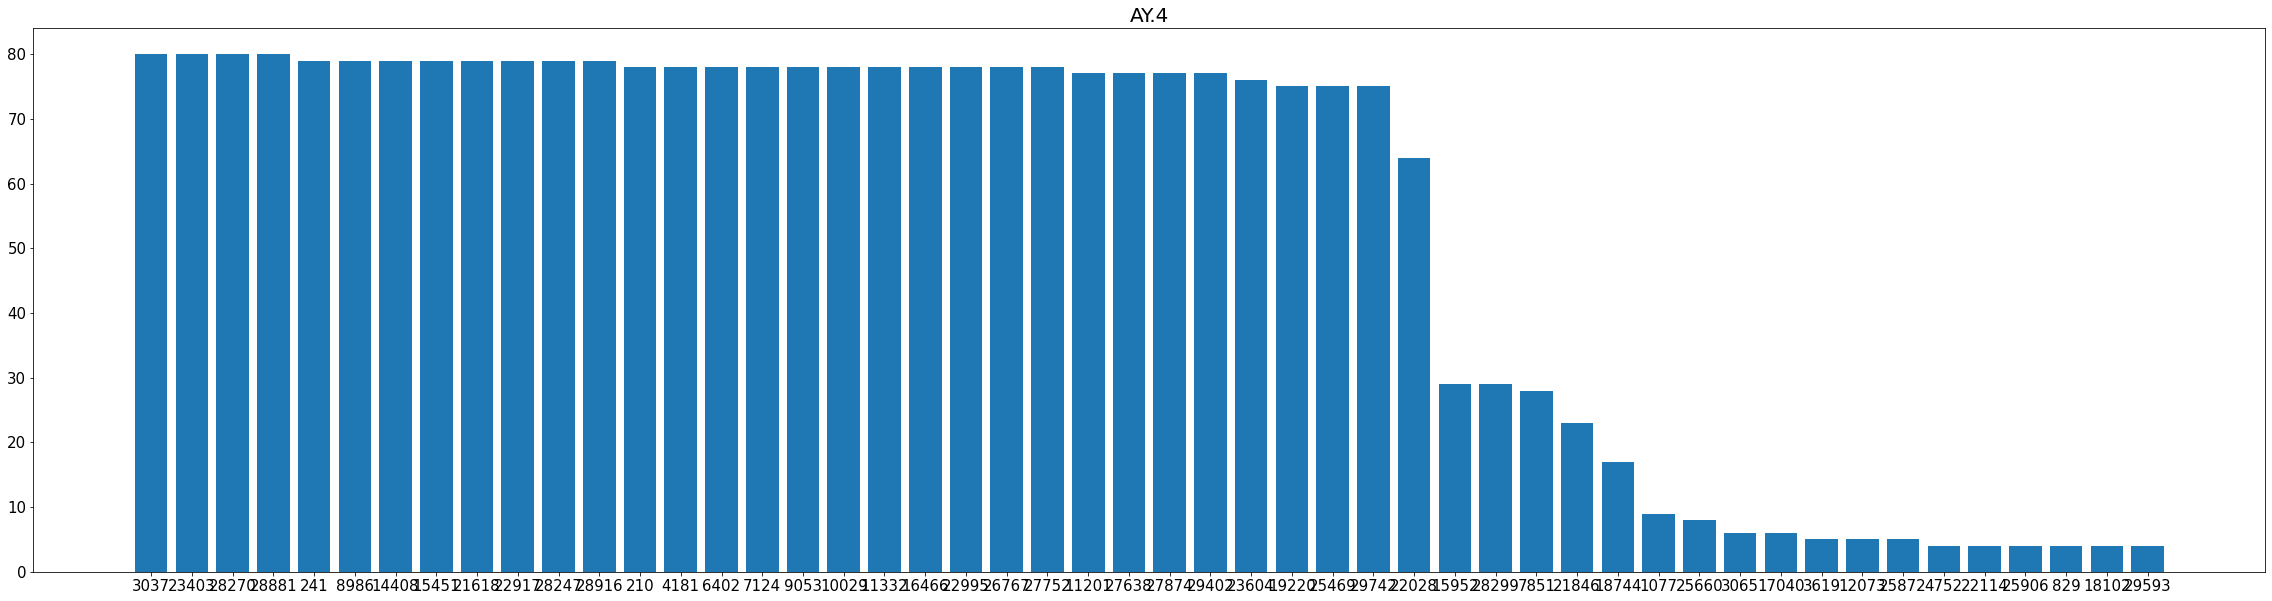

In [62]:
df2 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df2 = df2.dropna()
target2 = list(df2[(df2['lineage']=='AY.4 (Delta-like)')]['INAB sample ID'])
pos_record2 = {}

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record2:
                    pos_record2[record.POS] = 1
                else:
                    pos_record2[record.POS] += 1

res2 = sorted(pos_record2.items(),key = lambda item:item[1],reverse=True)
sor_res2 = {str(k):v for k,v in res2}
plt.figure(figsize=(40, 10))
x2 = list(sor_res2.keys())
y2 = list(sor_res2.values())
plt.tick_params(labelsize=15)
plt.title('AY.4',fontsize=20)
plt.bar(x2[:50],y2[:50])

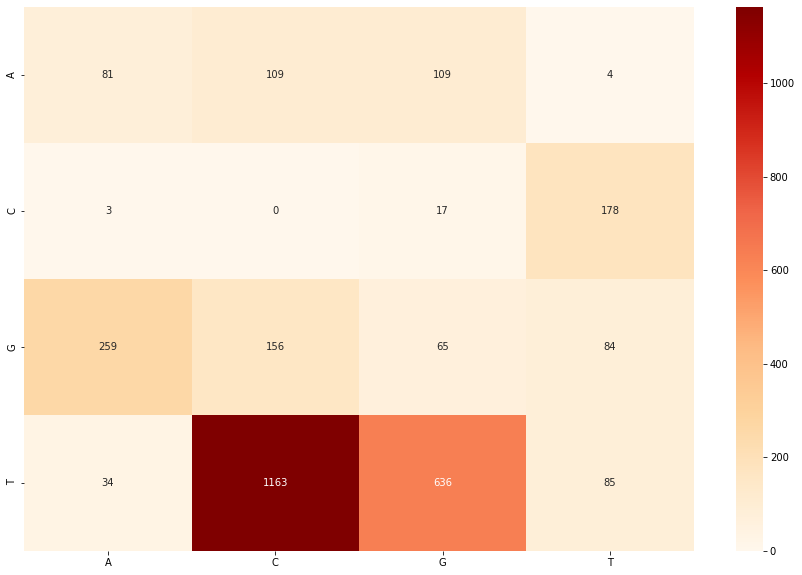

In [63]:
nucleotide_record2 = {'A':{'A':0,'C':0,'G':0,'T':0},'C':{'A':0,'C':0,'G':0,'T':0},
          'G':{'A':0,'C':0,'G':0,'T':0},'T':{'A':0,'C':0,'G':0,'T':0}}
nucleotide2 = ['A','C','G','T']
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.ALT[0] in nucleotide2:
                    if record.REF[0] in nucleotide2:
                        nucleotide_record2[record.REF[0]][str(record.ALT[0])]+=1

df2 = pd.DataFrame(nucleotide_record2, index=nucleotide2, columns=nucleotide2)
plt.figure(figsize=(15,10))
sns.heatmap(df2, annot=True, fmt='d',cmap="OrRd",annot_kws={'size':10})
plt.show()

In [93]:
x2 = []
for i in range(len(file_name)):
    tar = [0]*len(pos)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos:
                    if p.ALT[0] == 'A':
                        tar[pos.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos.index(str(p.POS))] = 4
            x2.append(tar)

AY4_POS = pd.DataFrame(x2)
AY4_POS.columns = pos
AY4_POS['Label'] =1

In [65]:
AY4_POS

,23403,28270,28881,14408,3037,22917,16466,22995,26767,28247,...,19009,23683,21846,22104,19245,22993,5392,15672,27745,Label
0,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY4
1,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY4
2,3,4,4,4,4,3,4,1,2,1,...,0,0,4,0,0,0,0,0,0,AY4
3,3,4,4,4,4,3,4,1,2,1,...,0,0,4,0,0,0,0,0,0,AY4
4,3,4,4,4,4,3,4,1,0,1,...,0,0,0,0,0,0,0,0,0,AY4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY4
76,3,4,4,4,4,3,4,1,2,1,...,0,0,4,0,0,0,0,0,0,AY4
77,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY4
78,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,AY4


# AY.9

<BarContainer object of 50 artists>

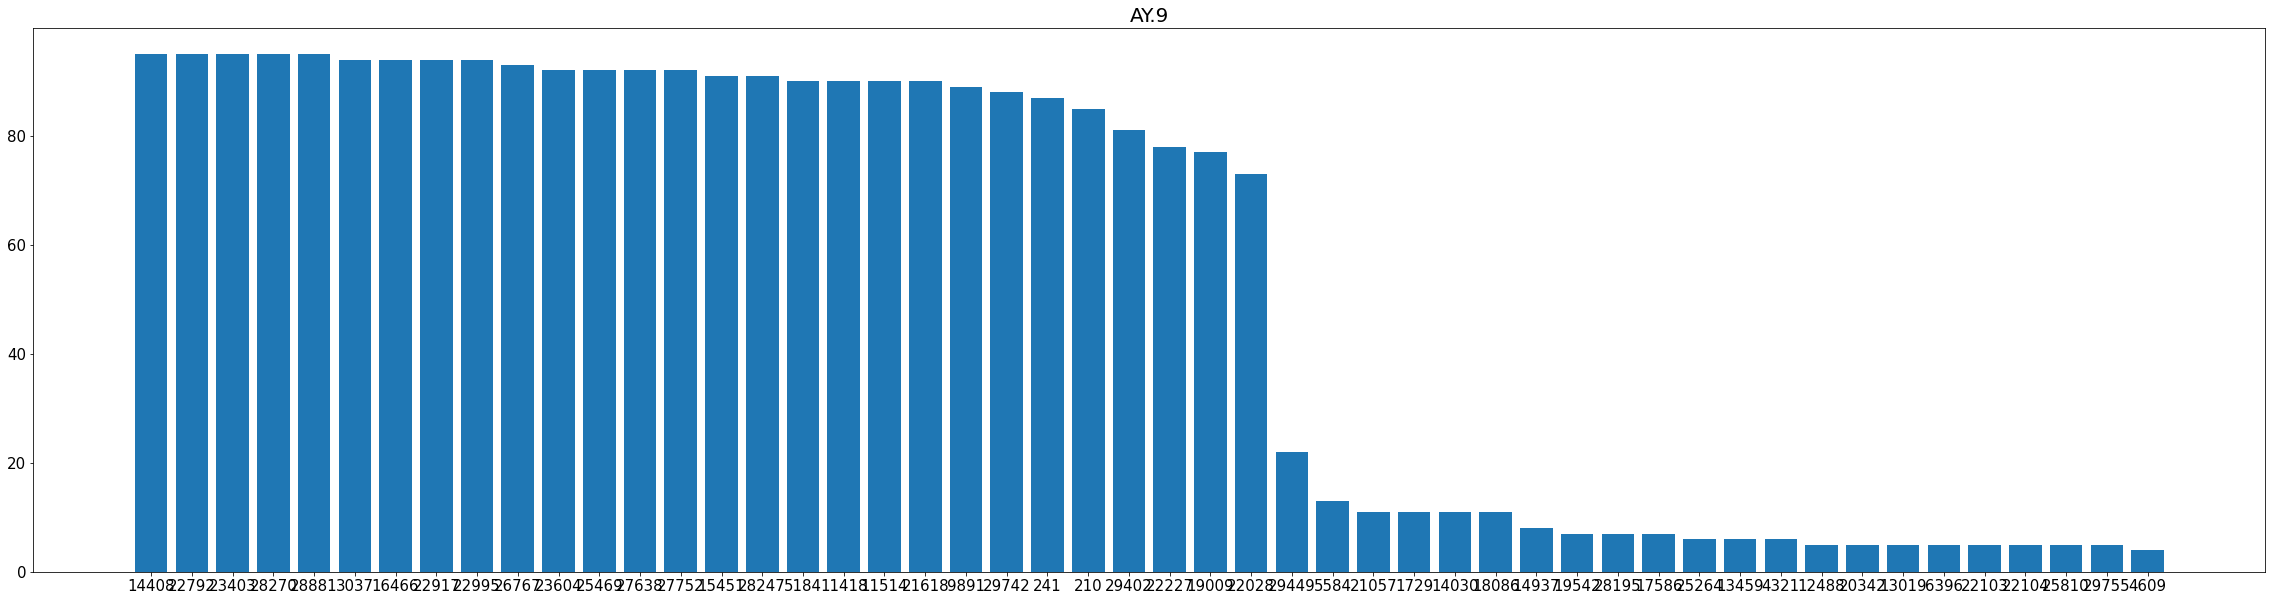

In [69]:
df3 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df3 = df3.dropna()
target3 = list(df3[(df3['lineage']=='AY.9 (Delta-like)')]['INAB sample ID'])
pos_record3 = {}

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target3:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record3:
                    pos_record3[record.POS] = 1
                else:
                    pos_record3[record.POS] += 1

res3 = sorted(pos_record3.items(),key = lambda item:item[1],reverse=True)
sor_res3 = {str(k):v for k,v in res3}
plt.figure(figsize=(40, 10))
x3= list(sor_res3.keys())
y3 = list(sor_res3.values())
plt.tick_params(labelsize=15)
plt.title('AY.9',fontsize=20)
plt.bar(x3[:50],y3[:50])

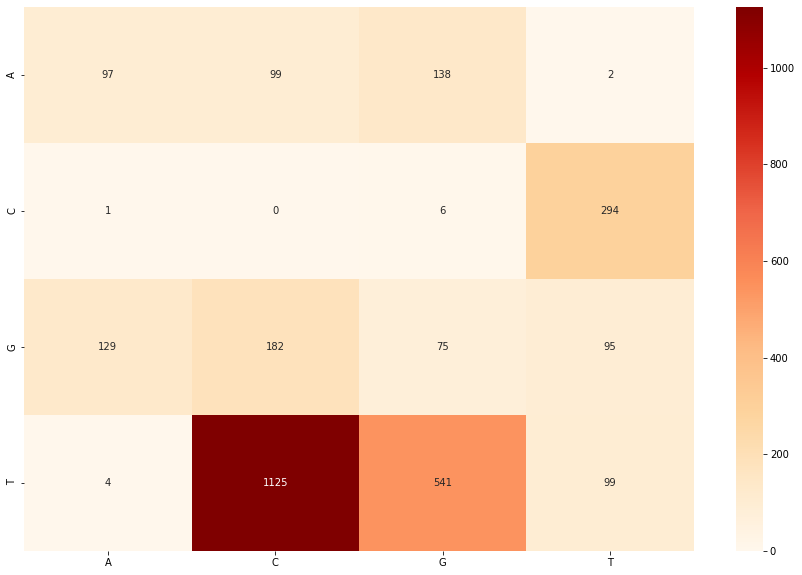

In [70]:
nucleotide_record3 = {'A':{'A':0,'C':0,'G':0,'T':0},'C':{'A':0,'C':0,'G':0,'T':0},
          'G':{'A':0,'C':0,'G':0,'T':0},'T':{'A':0,'C':0,'G':0,'T':0}}
nucleotide3 = ['A','C','G','T']
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target3:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.ALT[0] in nucleotide3:
                    if record.REF[0] in nucleotide3:
                        nucleotide_record3[record.REF[0]][str(record.ALT[0])]+=1

df3 = pd.DataFrame(nucleotide_record3, index=nucleotide3, columns=nucleotide3)
plt.figure(figsize=(15,10))
sns.heatmap(df3, annot=True, fmt='d',cmap="OrRd",annot_kws={'size':10})
plt.show()

In [94]:
x3 = []
for i in range(len(file_name)):
    tar = [0]*len(pos)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target3:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos:
                    if p.ALT[0] == 'A':
                        tar[pos.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos.index(str(p.POS))] = 4
            x3.append(tar)

AY9_POS = pd.DataFrame(x3)
AY9_POS.columns = pos
AY9_POS['Label'] =2
AY9_POS

,23403,28270,28881,14408,3037,22917,16466,22995,26767,28247,...,19009,23683,21846,22104,19245,22993,5392,15672,27745,Label
0,3,4,4,4,4,3,4,1,2,1,...,4,0,0,0,0,0,0,0,0,2
1,3,4,4,4,4,3,4,1,2,1,...,4,0,0,0,0,0,0,0,0,2
2,3,4,4,4,4,3,4,1,2,1,...,4,0,0,0,0,0,0,0,0,2
3,3,4,4,4,4,3,4,1,2,1,...,4,0,0,0,0,0,0,0,0,2
4,3,4,4,4,4,3,4,1,2,1,...,4,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,2
91,3,4,4,4,4,3,4,1,2,1,...,4,0,0,0,0,0,0,0,0,2
92,3,4,4,4,4,3,4,1,2,1,...,4,0,0,0,0,0,0,0,0,2
93,3,4,4,4,4,3,4,1,2,1,...,4,0,0,0,0,0,0,0,0,2


# Combine AY

In [97]:
a = AY12_POS.append(AY9_POS)
fin_AY = a.append(AY4_POS)
fin_AY

,23403,28270,28881,14408,3037,22917,16466,22995,26767,28247,...,19009,23683,21846,22104,19245,22993,5392,15672,27745,Label
0,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,3
1,3,4,4,4,4,3,4,1,2,1,...,0,4,0,4,4,4,4,4,3,3
2,3,4,4,4,4,3,4,1,2,1,...,0,4,0,4,4,4,4,4,3,3
3,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,3
4,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,1
76,3,4,4,4,4,3,4,1,2,1,...,0,0,4,0,0,0,0,0,0,1
77,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,1
78,3,4,4,4,4,3,4,1,2,1,...,0,0,0,0,0,0,0,0,0,1


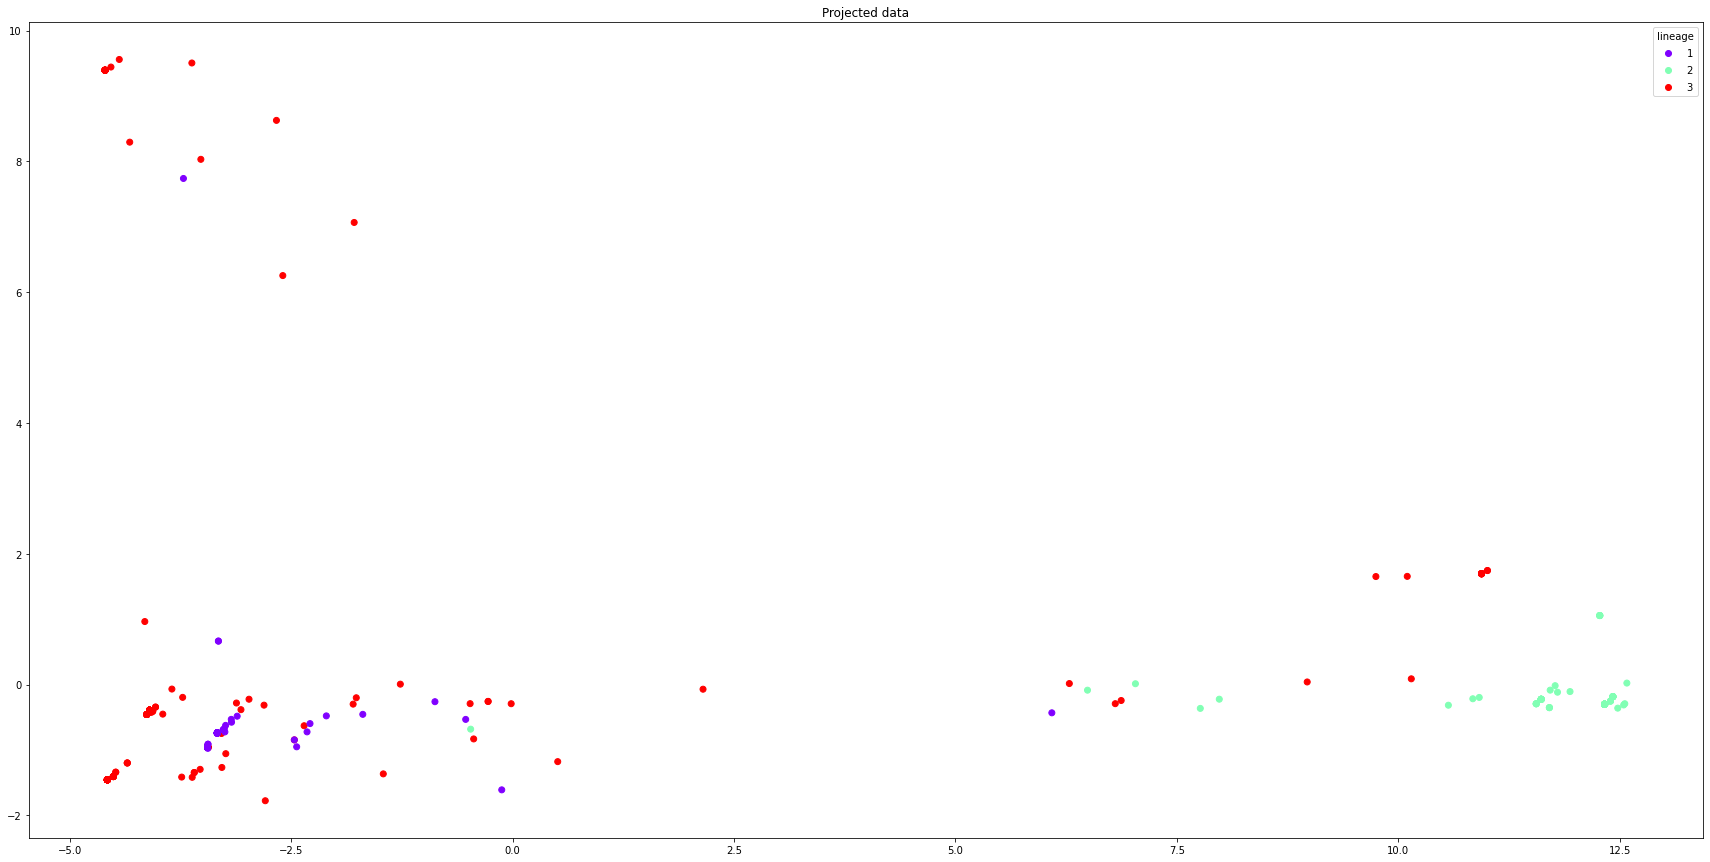

In [100]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(fin_AY.iloc[:,:-1])

# Project data onto first two principal components
projX = pca.transform(fin_AY.iloc[:,:-1])
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],c=fin_AY.iloc[:,-1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = scatter.legend_elements()[1],
           title="lineage")
plt.title('Projected data')
plt.show()

pos

In [54]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

In [55]:
target = list(df[(df['lineage']=='B.1.617.2')|(df['lineage']=='AY.12 (Delta-like)')|(df['lineage']=='AY.9 (Delta-like)')|(df['lineage']=='AY.4 (Delta-like)')]['INAB sample ID'])
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

pos_record = {}

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}
x = list(sor_res.keys())

pos2 = x[:100]

AY4

In [56]:
df2 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df2 = df2.dropna()
target2 = list(df2[(df2['lineage']=='AY.4 (Delta-like)')]['INAB sample ID'])
x2 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target2:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x2.append(tar)

AY4_POS2 = pd.DataFrame(x2)
AY4_POS2.columns = pos2
AY4_POS2['Label'] =0

AY9

In [57]:
df3 = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df3 = df3.dropna()
target3 = list(df3[(df3['lineage']=='AY.9 (Delta-like)')]['INAB sample ID'])

x3 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target3:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x3.append(tar)

AY9_POS2 = pd.DataFrame(x3)
AY9_POS2.columns = pos2
AY9_POS2['Label'] =1

AY12

In [58]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()
target1 = list(df[(df['lineage']=='AY.12 (Delta-like)')]['INAB sample ID'])

x = []
name1 = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target1:
            name1.append(t[0])
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x.append(tar)
            
AY12_POS2 = pd.DataFrame(x)
AY12_POS2.columns = pos2
AY12_POS2['Label'] = 2

B.1.617.2

In [59]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()
target5 = list(df[(df['lineage']=='B.1.617.2')]['INAB sample ID'])

x = []
for i in range(len(file_name)):
    tar = [0]*len(pos2)
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target5:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for p in test:
                if str(p.POS) in pos2:
                    if p.ALT[0] == 'A':
                        tar[pos2.index(str(p.POS))] = 1
                    if p.ALT[0] == 'C':
                        tar[pos2.index(str(p.POS))] = 2
                    if p.ALT[0] == 'G':
                        tar[pos2.index(str(p.POS))] = 3
                    if p.ALT[0] == 'T':
                        tar[pos2.index(str(p.POS))] = 4
            x.append(tar)
            
B16172_POS2 = pd.DataFrame(x)
B16172_POS2.columns = pos2
B16172_POS2['Label'] = 3

In [60]:
b = AY4_POS2.append(AY9_POS2)
c = b.append(AY12_POS2)
fin_data = c.append(B16172_POS2)
fin_data

,23403,14408,28270,28881,3037,16466,26767,22917,15451,22995,...,29705,24410,21987,28018,64,21255,28899,28903,21,Label
0,3,4,4,4,4,4,2,3,1,1,...,0,0,0,0,0,0,0,0,0,0
1,3,4,4,4,4,4,2,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,4,4,4,4,4,2,3,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,4,4,4,4,4,2,3,1,1,...,0,0,0,0,0,0,0,0,0,0
4,3,4,4,4,4,4,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,3,4,4,4,4,4,2,3,1,1,...,0,0,1,0,0,0,0,0,0,3
964,3,4,4,4,4,4,2,3,1,1,...,0,0,0,0,0,0,0,0,0,3
965,3,4,4,4,4,4,2,3,1,1,...,0,0,0,0,0,0,0,0,0,3
966,3,4,0,0,4,4,2,3,0,1,...,0,1,0,0,0,0,0,0,0,3


卡方检验

In [63]:
from sklearn.feature_selection import SelectKBest  #卡方检验->判断离散型特征是否相关
from sklearn.feature_selection import chi2

selectKBest = SelectKBest(chi2, k=100) 
X_new = selectKBest.fit_transform(fin_data.iloc[:,:-1], fin_data.iloc[:,-1])
sel_feature = []
sel_p = list(selectKBest.pvalues_)
for i in range(100):
    a = sel_p[i]
    if a<0.05:
        sel_feature.append(i)

信息增益

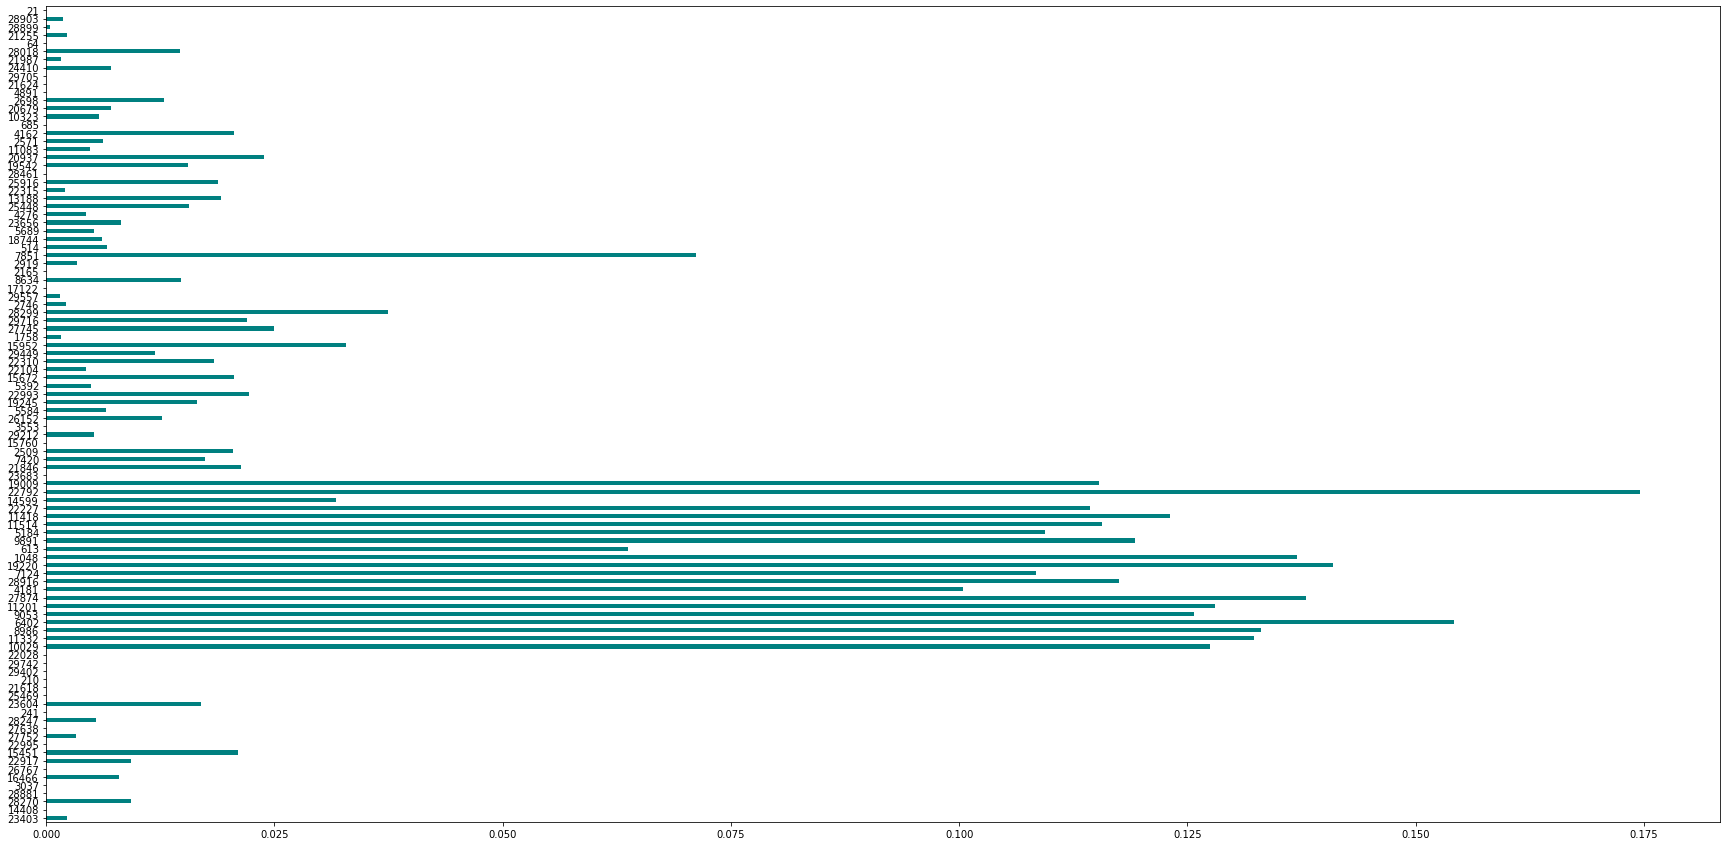

In [80]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
importances = mutual_info_classif(fin_data.iloc[:,:-1], fin_data.iloc[:,-1])
feat_importances = pd.Series(importances,fin_data.columns[:-1])
plt.figure(figsize=(30,15))
feat_importances.plot(kind= 'barh', color = 'teal')
plt.show()

In [92]:
infor_sel = list(feat_importances[feat_importances>0.005].index)

In [95]:
sel = fin_data[infor_sel]
train_X,test_X,train_y,test_y = train_test_split(sel,fin_data.iloc[:,-1],test_size=0.2)
lg = LogisticRegression()
lg.fit(train_X, train_y)
y_predict = lg.predict(test_X)
print("accuracy：", lg.score(test_X, test_y))
print("recall：", classification_report(test_y, y_predict))

accuracy： 0.6958041958041958
recall：               precision    recall  f1-score   support

           0       0.44      0.31      0.36        13
           1       0.80      0.21      0.33        19
           2       0.47      0.14      0.22        56
           3       0.72      0.92      0.81       198

    accuracy                           0.70       286
   macro avg       0.61      0.40      0.43       286
weighted avg       0.66      0.70      0.64       286



C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [100]:
from sklearn.naive_bayes import MultinomialNB  # 使用sklearn中的贝叶斯分类器，并且加载贝叶斯分类器
 
# 中的MultinomialNB多项式函数
clf = MultinomialNB()  # 加载多项式函数
x_clf = clf.fit(train_X, train_y)  # 构造基于数据的分类器
y_predict = x_clf.predict(test_X)
print("accuracy：", lg.score(test_X, test_y))
print("recall：", classification_report(test_y, y_predict))

accuracy： 0.6958041958041958
recall：               precision    recall  f1-score   support

           0       0.28      0.92      0.43        13
           1       0.21      0.95      0.34        19
           2       0.37      0.82      0.51        56
           3       0.88      0.14      0.24       198

    accuracy                           0.36       286
   macro avg       0.43      0.71      0.38       286
weighted avg       0.70      0.36      0.31       286



C:\Users\Aral\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

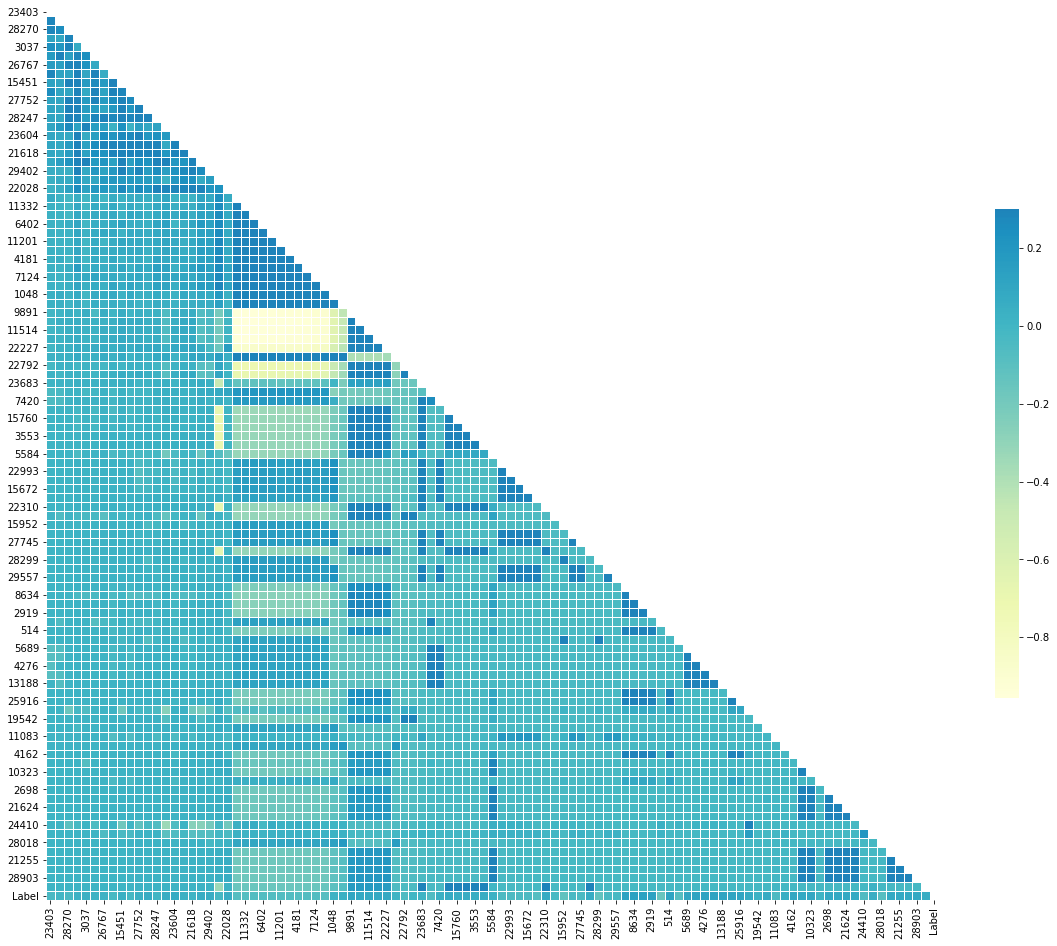

In [65]:
corr = fin_data.corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.30, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})



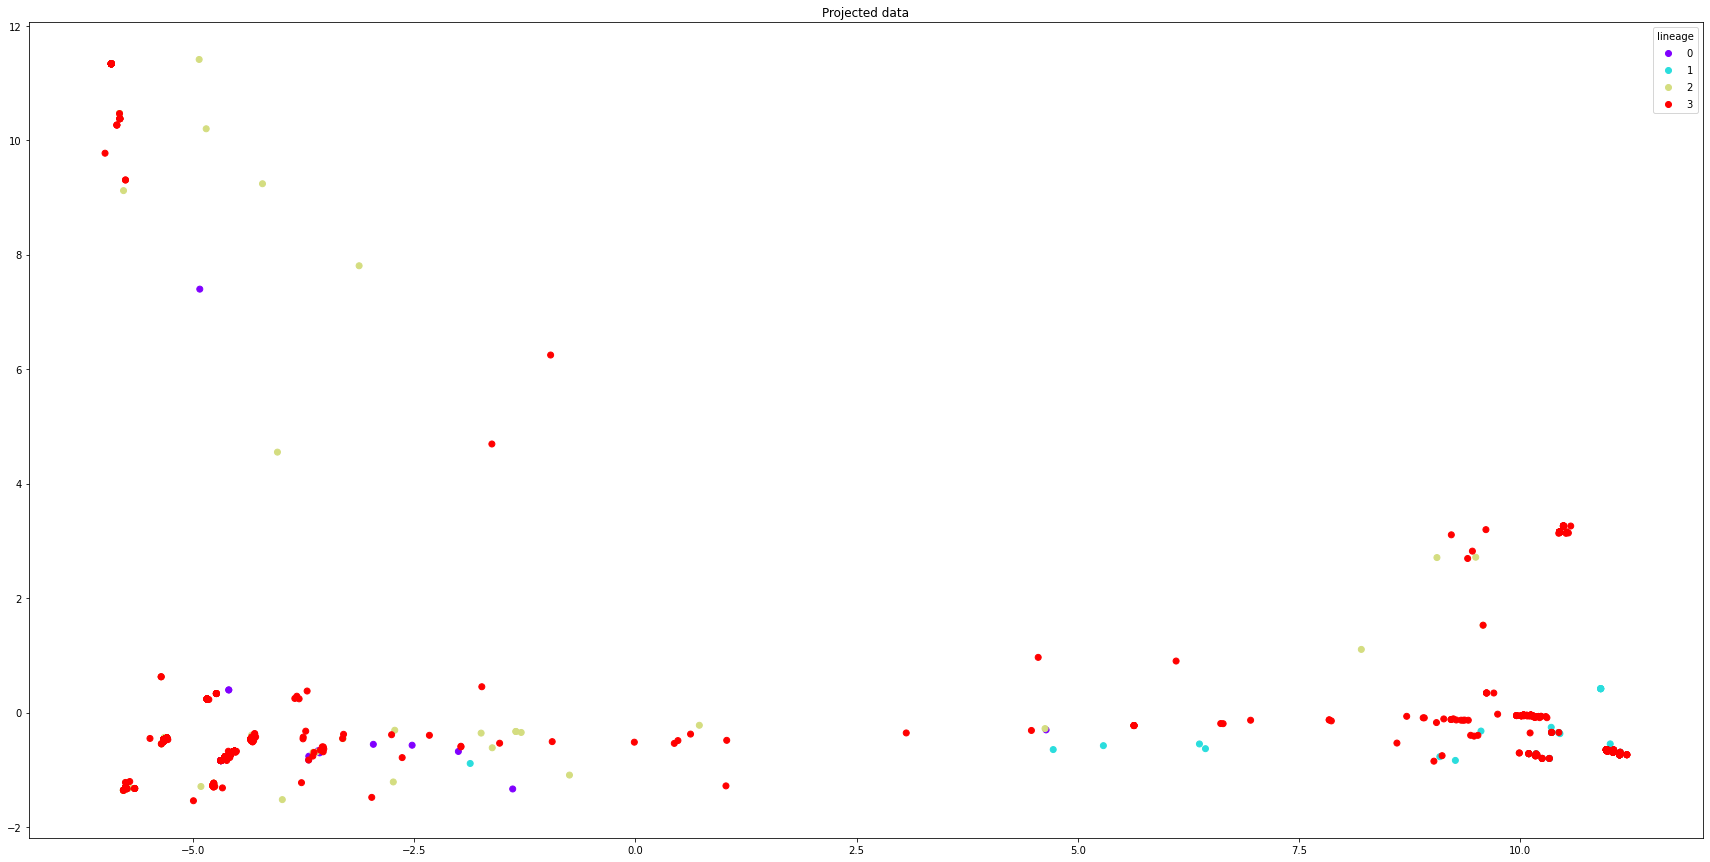

In [69]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(fin_data.iloc[:,21:-1])

# Project data onto first two principal components
projX = pca.transform(fin_data.iloc[:,21:-1])
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],c=fin_data.iloc[:,-1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = scatter.legend_elements()[1],
           title="lineage")
plt.title('Projected data')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

train_X,test_X,train_y,test_y = train_test_split(fin_data.iloc[:,21:-1],fin_data.iloc[:,-1],test_size=0.2)
lg = LogisticRegression()
lg.fit(train_X, train_y)
print("regression coffecient：", lg.coef_)
y_predict = lg.predict(test_X)
print("accuracy：", lg.score(test_X, test_y))
print("prediction：", y_predict)
print("recall：", classification_report(test_y, y_predict))

regression coffecient： [[-5.27905313e-01 -5.43414665e-01  1.74816370e-01  8.53520832e-02
   1.84174368e-01  2.86372930e-02 -3.17450766e-02  2.53616843e-01
   6.82284002e-01  4.44171741e-01 -1.71017122e-01 -1.35655120e+00
   1.22501558e-01 -3.85377138e-01 -3.39027601e-01 -3.33285555e-01
  -1.65948769e-01 -2.83152179e-01  8.02992303e-02 -3.09685998e-01
  -1.87879609e-01  1.13715924e-01 -5.01979135e-01  5.99650660e-02
  -8.46197104e-02 -7.85611272e-02 -7.85611272e-02 -2.71423943e-02
  -1.31971236e-02 -5.41501876e-02  1.42365808e-01 -1.01945238e-01
   1.43688266e-01  1.42365808e-01  3.53820746e-01 -4.79814143e-02
  -5.04448365e-02 -1.69895062e-02 -3.21784714e-01  1.21022609e-01
  -1.17675883e-02  8.81926079e-03 -1.59714749e-01 -3.13325652e-01
  -5.25733744e-02 -3.24740729e-02 -2.24110439e-02 -4.48220878e-02
   7.49010986e-01 -3.33063125e-02  1.86320555e-01 -1.19896893e-01
  -1.17589176e-01 -1.45102232e-01 -1.17589176e-01 -7.03887768e-02
  -1.96490908e-02 -2.67427295e-02 -5.15985489e-01 -2.

C:\Users\Aral\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
